In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np

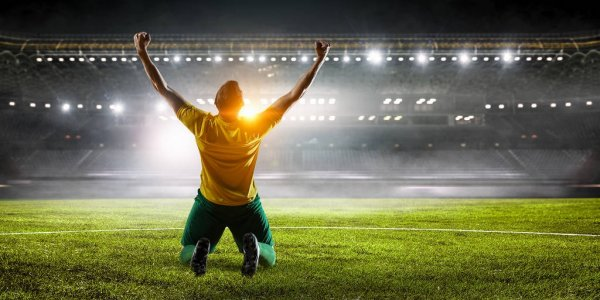

In [ ]:
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/images/football.png')
cv2_imshow(image)

In [ ]:
image.shape

(337, 600, 3)

In [ ]:
image_blob = cv2.dnn.blobFromImage(image, 1/255, size=(image.shape[1], image.shape[0]))

In [ ]:
image_blob.shape

(1, 3, 300, 600)

In [ ]:
network = cv2.dnn.readNetFromCaffe('/content/drive/MyDrive/Colab Notebooks/pose_deploy_linevec_faster_4_stages.prototxt',
                                   '/content/drive/MyDrive/Colab Notebooks/pose_iter_160000.caffemodel')

In [ ]:
network.setInput(image_blob)
output = network.forward()

In [ ]:
len(output[0])

44

In [ ]:
num_points = 15
for i in range(num_points):
  print(i)
  confidence_map = output[0, i, :, :]
  print(confidence_map)
  print(len(confidence_map))

0
[[0.0005126  0.00040916 0.00036744 ... 0.00034928 0.0003825  0.00040784]
 [0.00040786 0.00038088 0.00034904 ... 0.00034191 0.00038715 0.00041705]
 [0.00040041 0.00037905 0.00036238 ... 0.00036773 0.00038426 0.0003949 ]
 ...
 [0.00044752 0.00041551 0.00041342 ... 0.00033297 0.00037067 0.00039564]
 [0.00045752 0.00044548 0.00044675 ... 0.00035144 0.00039268 0.00042573]
 [0.00048882 0.00046713 0.00047131 ... 0.00035795 0.00041849 0.00049145]]
38
1
[[0.0007717  0.00077366 0.0006838  ... 0.00064008 0.00072006 0.0007638 ]
 [0.00074256 0.00070429 0.0006395  ... 0.00062233 0.00073126 0.00079587]
 [0.00073062 0.00070337 0.00067161 ... 0.0006845  0.0007243  0.00074992]
 ...
 [0.00085003 0.00078405 0.00077418 ... 0.0006008  0.00069157 0.0007517 ]
 [0.00087895 0.00084331 0.00083818 ... 0.00064527 0.00074458 0.00080905]
 [0.00094486 0.00088531 0.00088748 ... 0.00066095 0.00079868 0.00095119]]
38
2
[[3.0777475e-04 2.7297868e-04 1.5507871e-04 ... 1.0693085e-04
  1.9501289e-04 2.7406297e-04]
 [2.887

In [ ]:
# minMaxLoc: https://docs.opencv.org/master/d2/de8/group__core__array.html#gab473bf2eb6d14ff97e89b355dac20707
num_points = 15
points = []
threshold = 0.1
for i in range(num_points):
  #print(i)
  confidence_map = output[0, i, :, :]
  #print(confidence_map)
  #print(len(confidence_map))
  _, confidence, _, point = cv2.minMaxLoc(confidence_map)
  #print(confidence)
  #print(point)

  x = int((image.shape[1] * point[0]) / position_width)
  y = int((image.shape[0] * point[1]) / position_heigth)
  #print(x,y)
  if confidence > threshold:
    cv2.circle(image, (x, y), 2, (0, 0,0), thickness = -1)
    cv2.putText(image, '{}'.format(i), (x,y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255))
    points.append((x,y))
  else:
    points.append(None)
points

[(224, 69),
 (224, 104),
 (256, 104),
 (288, 76),
 (320, 48),
 (200, 104),
 (160, 76),
 (136, 41),
 (240, 174),
 (264, 216),
 (248, 209),
 (208, 174),
 (192, 209),
 (184, 209),
 (224, 139)]

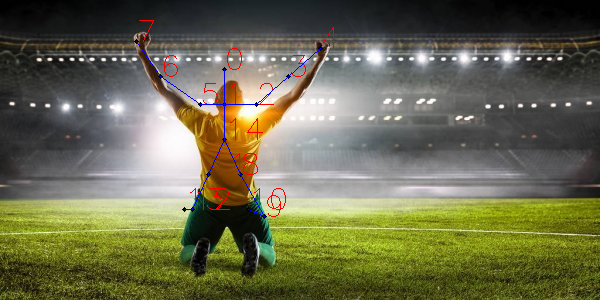

In [ ]:
point_connections = [[0,1], [1,2], [2,3], [3,4], [1,5], [5,6], [6,7],[1,14],
                     [14,8], [8,9], [9,10], [14,11], [11,12], [12,13]]
for connection in point_connections:
  #print(connection)
  partA = connection[0]
  partB = connection[1]
  #print(partA, partB)
  if points[partA] and points[partB]:
    cv2.line(image, points[partA], points[partB], (255,0,0))
cv2_imshow(image)

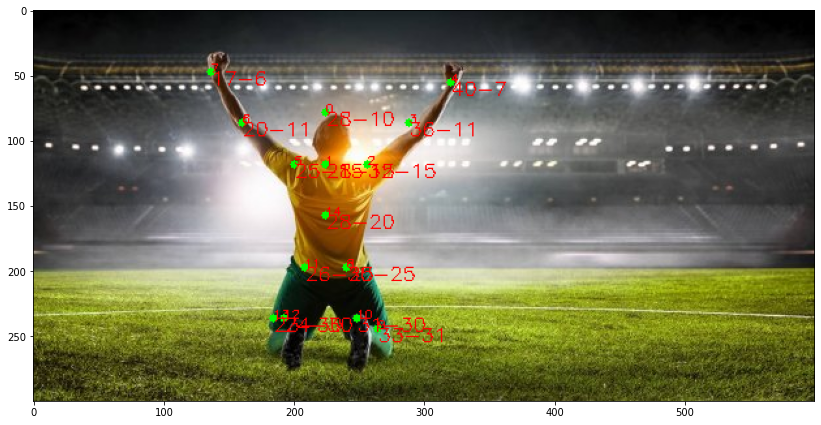

In [ ]:

image2 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/images/football.png')
image_blob2 = cv2.dnn.blobFromImage(image = image2, scalefactor = 1.0 / 255, size = (image2.shape[1], image2.shape[0]))
network.setInput(image_blob2)
output2 = network.forward()
position_width = output2.shape[3]
position_height = output2.shape[2]
num_points = 15
points = []
threshold = 0.1
for i in range(num_points):
  confidence_map = output2[0, i, :, :]
  _, confidence, _, point = cv2.minMaxLoc(confidence_map) 
  x = int((image2.shape[1] * point[0]) / position_width)
  y = int((image2.shape[0] * point[1]) / position_height)
  
  if confidence > threshold:
    cv2.circle(image2, (x, y), 3, (0,255,0), thickness = -1)
    cv2.putText(image2, "{}".format(i), (x, y), cv2.FONT_HERSHEY_SIMPLEX, .3, (0, 0, 255))
    cv2.putText(image2, '{}-{}'.format(point[0], point[1]), (x, y + 10), cv2.FONT_HERSHEY_SIMPLEX, .5, (0,0,255))
    points.append((x, y))
  else:
    points.append(None)

plt.figure(figsize = [14,10])
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB));

In [ ]:
def verify_arms_up(points):
  head, right_wrist, left_wrist = 0, 0, 0
  for i, point in enumerate(points):
    #print(i, point)
    if i == 0:
      head = point[1]
    elif i == 4:
      right_wrist = point[1]
    elif i == 7:
      left_wrist = point[1]
  
  #print(head, right_wrist, left_wrist)
  if right_wrist < head and left_wrist < head:
    return True
  else:
    return False

In [ ]:
a = verify_arms_up(points)
if a==True:
  cv2.putText(image, "arms up", (10, 15), cv2.FONT_HERSHEY_SIMPLEX, .9, (0, 255, 255))
else:
  cv2.putText(image, "arms down", (10, 15), cv2.FONT_HERSHEY_SIMPLEX, .9, (0, 255, 255))

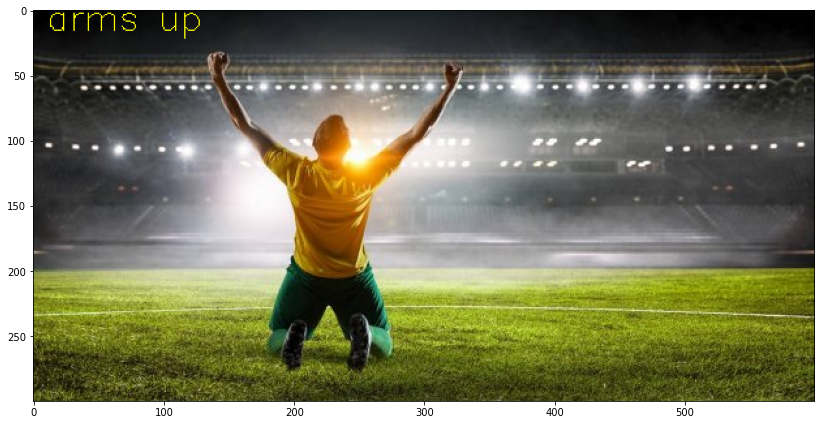

In [ ]:
plt.figure(figsize = [14,10])
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB));

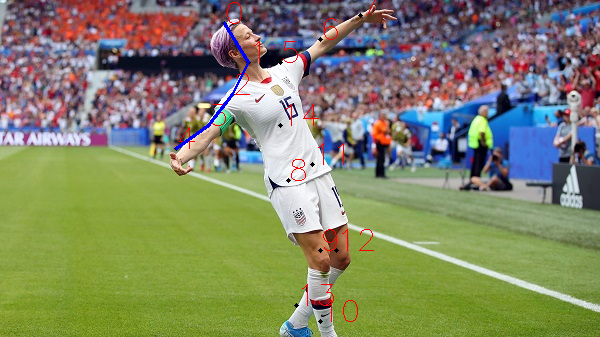

In [ ]:
points[:5]
for i in range(4):
  cv2.line(image, points[i], points[i+1], (255,0,0), 2)
cv2_imshow(image)
for i in (points[14],points)

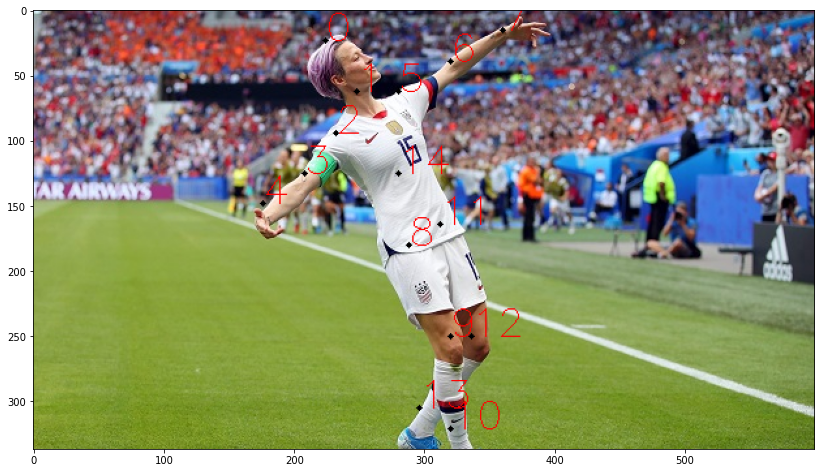

In [ ]:
plt.figure(figsize=(14,10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB));